In [1]:
from aicsimageio.readers import CziReader
import matplotlib.pyplot as plt
import cv2 as cv
import os

# read smear
reader = CziReader("/mnt/storage/TBProject/TB_sample/2022-06-29/extern_Synlab_2152_42_1_MTB.czi")

# load as numpy array
smear = reader.get_image_data("MYX", C=0)

if not os.path.exists("Smear_2152_42_1"):
    os.mkdir("Smear_2152_42_1")
# save all images of the smear in tiff format
for idx, img in enumerate(smear):
    if idx == 1288:
        plt.imsave(f'Smear_2152_42_1/tile_{idx}.tiff', img)
    if idx == 1289:
        plt.imsave(f'Smear_2152_42_1/tile_{idx}.tiff', img)
    if idx == 1290:
        plt.imsave(f'Smear_2152_42_1/tile_{idx}.tiff', img)
    

KeyboardInterrupt: 

In [1]:
import os

# get list of files in a directory
files = os.listdir("smears_json")
print(files)
len(files)

['extern_Synlab_2163_85_3_MTB.czi.json', 'extern_Synlab_2142_48_1_MTB.czi.json', 'extern_Synlab_2154_10_1_MTBok.czi.json', 'extern_Synlab_2153_40wdh_1_MTB.czi.json', 'extern_Synlab_2166_4_1_Mmalmoense.czi.json', 'extern_Synlab_2154_52_1_MTB.czi.json', 'extern_Synlab_2166_18_1_Mmalmoense.czi.json', 'extern_Synlab_2151_104_1_MTB.czi.json', 'extern_Synlab_2142_59_1_MTB.czi.json', 'extern_Synlab_2152_98_1_MTB.czi.json', 'extern_Synlab_2156_17_3_MTB.czi.json', 'extern_Synlab_2153_124_2_MTB.czi.json', 'extern_Synlab_2143_82_9_.czi.json', 'extern_Synlab_2141_87_1_MTB ok.czi.json', 'extern_Synlab_2163_88_4_MTB.czi.json', 'extern_Synlab_2163_89_4_MTB.czi.json', 'extern_Synlab_2164_53_4_MTB.czi.json', 'extern_Synlab_2151_24wdh_0_.czi.json', 'extern_Synlab_2151_62_0_MTB.czi.json', 'extern_Synlab_2152_36_2_MTB-1.czi.json', 'extern_Synlab_2163_64_3_MTB.czi.json', 'extern_Synlab_2162_84_3_MTB.czi.json', 'extern_Synlab_2143_85_1_MTB.czi.json', 'extern_Synlab_2153_40_1_MTB.czi.json', 'extern_Synlab_21

87

In [2]:
bacilli_count = {}
import json
bacilli_count["smears"] = {}
for file in files:
    path = os.path.join("smears_json", file)
    with open(path, "r") as f:
        smear = json.load(f)
    bacilli_count["smears"][file] = [smear["severity"], smear["tot_num_of_bacilli"]]
    # remove some keys to this dictionary
    
with open("smears_post_processed.json", "w") as f:
    json.dump(bacilli_count, f)

In [3]:
import numpy as np
severity_0 = []
severity_1 = []
severity_2 = []
severity_3 = []
severity_4 = []

for smear in bacilli_count["smears"]:
    if bacilli_count["smears"][smear][0] == "0":
        severity_0.append(bacilli_count["smears"][smear][1])
    if bacilli_count["smears"][smear][0] == "1":
        severity_1.append(bacilli_count["smears"][smear][1])
    if bacilli_count["smears"][smear][0] == "2":
        severity_2.append(bacilli_count["smears"][smear][1])
    if bacilli_count["smears"][smear][0] == "3":
        severity_3.append(bacilli_count["smears"][smear][1])
    if bacilli_count["smears"][smear][0] == "4":
        severity_4.append(bacilli_count["smears"][smear][1])
        
bacilli_count["0"] = severity_0
bacilli_count["1"] = severity_1
bacilli_count["2"] = severity_2
bacilli_count["3"] = severity_3
bacilli_count["4"] = severity_4

bacilli_count["average_0"] = np.mean(severity_0)
bacilli_count["average_1"] = np.mean(severity_1)
bacilli_count["average_2"] = np.mean(severity_2)
bacilli_count["average_3"] = np.mean(severity_3)
bacilli_count["average_4"] = np.mean(severity_4)
bacilli_count["standard_deviation_0"] = np.std(severity_0)
bacilli_count["standard_deviation_1"] = np.std(severity_1)
bacilli_count["standard_deviation_2"] = np.std(severity_2)
bacilli_count["standard_deviation_3"] = np.std(severity_3)
bacilli_count["standard_deviation_4"] = np.std(severity_4)
 
with open("smears_post_processed.json", "w") as f:
    json.dump(bacilli_count, f)

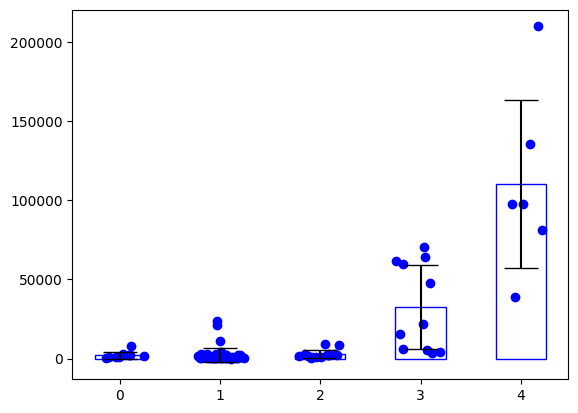

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

with open("smears_post_processed.json", "r") as f:
    bacilli_count = json.load(f)
np.random.seed(123)

severity_0 = bacilli_count["0"]
severity_1 = bacilli_count["1"]
severity_2 = bacilli_count["2"]
severity_3 = bacilli_count["3"]
severity_4 = bacilli_count["4"]
height = [bacilli_count["average_0"], bacilli_count["average_1"], bacilli_count["average_2"], bacilli_count["average_3"], bacilli_count["average_4"]]
err = [bacilli_count["standard_deviation_0"],bacilli_count["standard_deviation_1"], bacilli_count["standard_deviation_2"], bacilli_count["standard_deviation_3"], bacilli_count["standard_deviation_4"]]
w = 0.5    # bar width
x = [0,1,2,3,4] # x-coordinates of your bars
severity = ["0", "1", "2", "3", "4"]
colors = [(0, 0, 1, 1), (0, 0, 1, 1), (0, 0, 1, 1), (0, 0, 1, 1)]    # corresponding colors

fig, ax = plt.subplots()

ax.bar(x=severity, height=height, yerr=err, capsize=12, edgecolor=colors, color=(0,0,0,0), width=w)

ax.scatter(x[0] + np.random.random(len(severity_0)) * w - w / 2, severity_0, color=colors[0])
ax.scatter(x[1] + np.random.random(len(severity_1)) * w - w / 2, severity_1, color=colors[1])
ax.scatter(x[2] + np.random.random(len(severity_2)) * w - w / 2, severity_2, color=colors[2])
ax.scatter(x[3] + np.random.random(len(severity_3)) * w - w / 2, severity_3, color=colors[3])
ax.scatter(x[4] + np.random.random(len(severity_4)) * w - w / 2, severity_4, color=colors[3])

# save bar plot with points
plt.savefig("bar_plot_with_points.png")

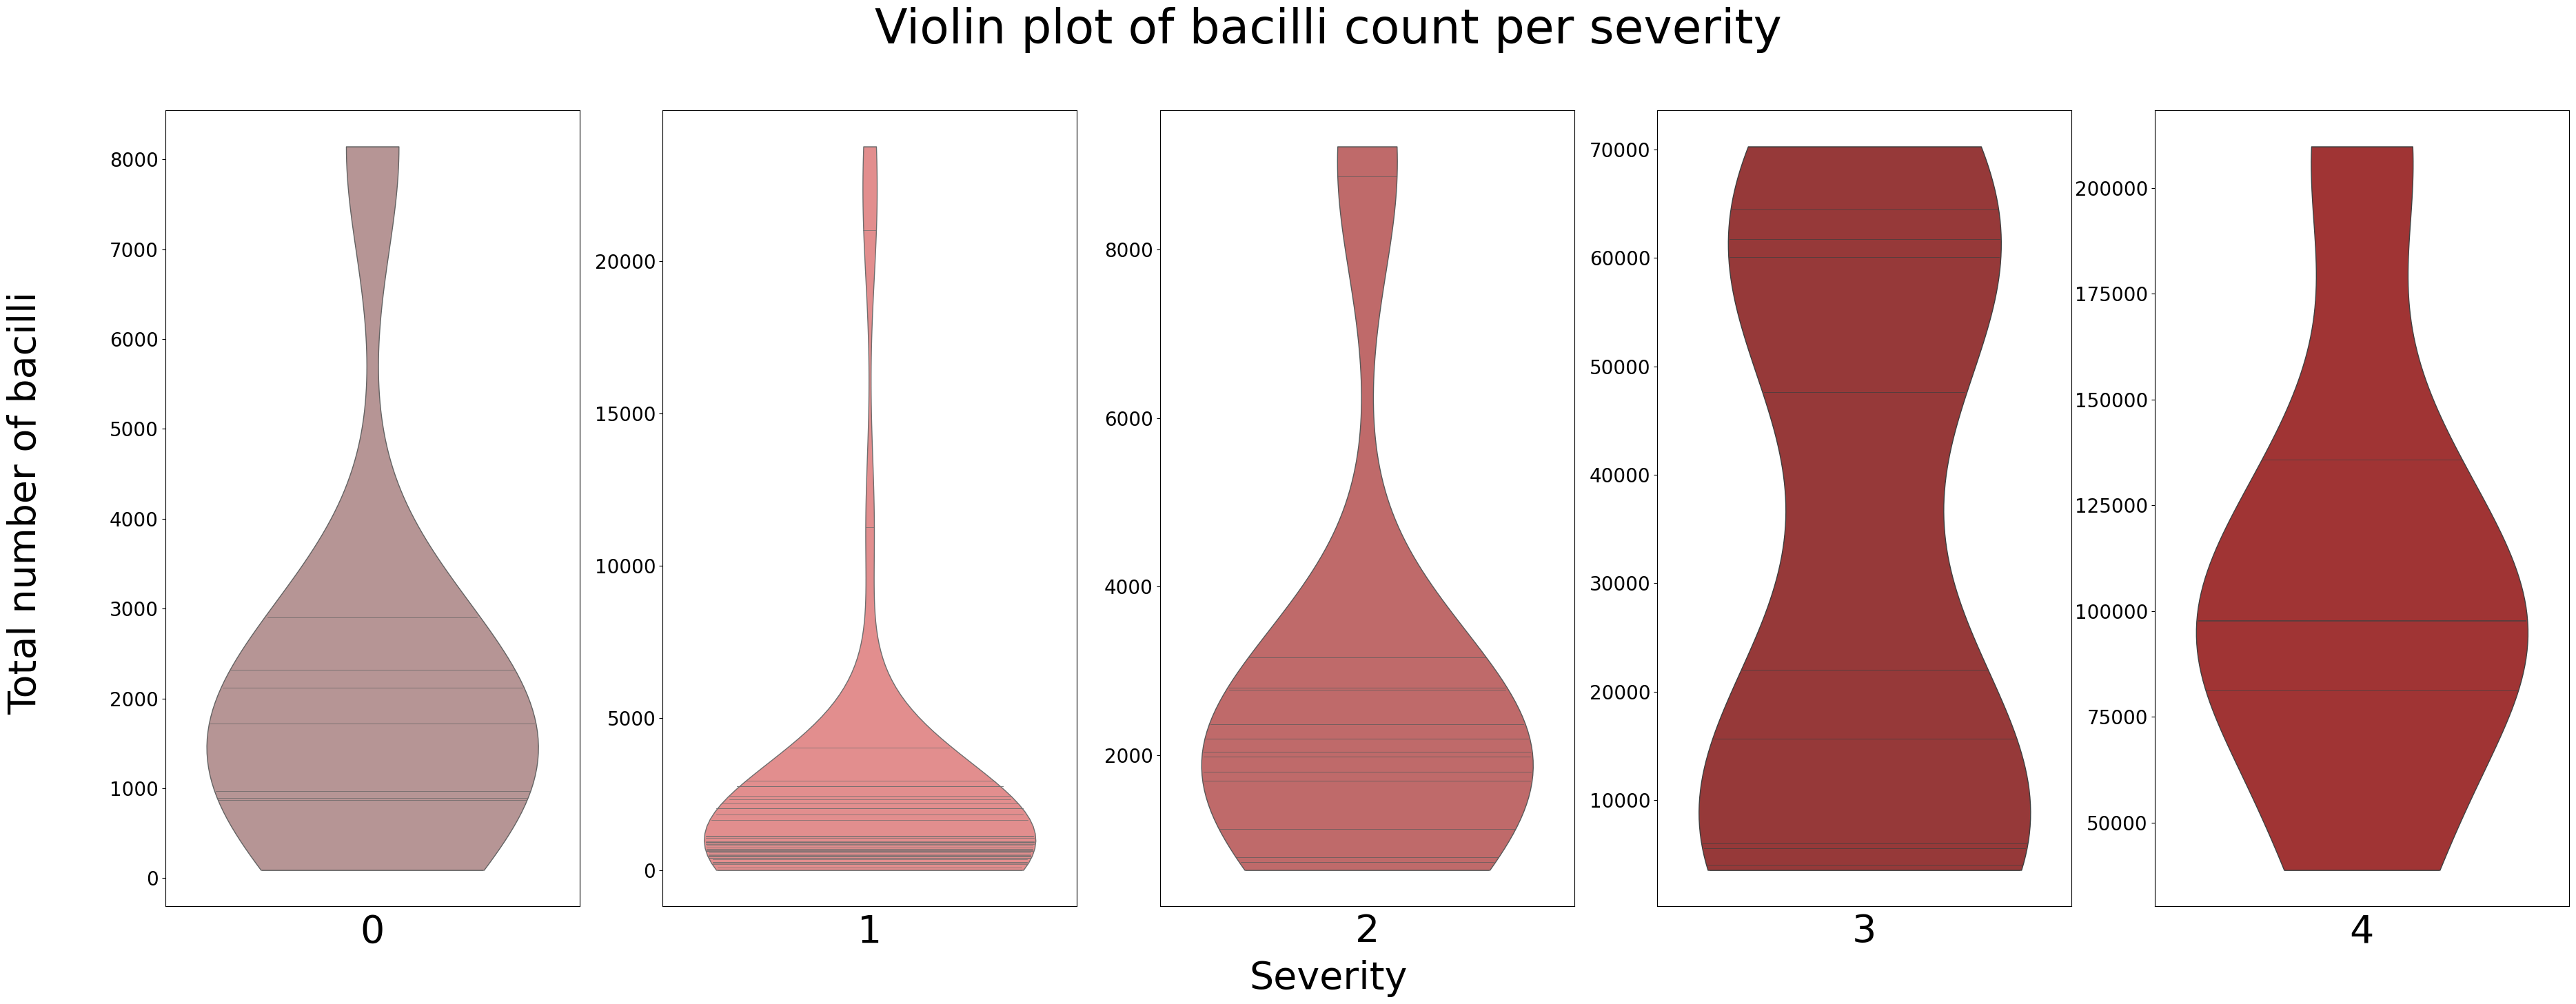

In [101]:
import seaborn as sns
import pandas as pd


# plot data using violin plot

fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5)
# increase fiugre size
fig.set_size_inches(45, 15)

sns.violinplot(data=severity_0, bw=0.5, cut=0, linewidth=1, color="rosybrown", inner="stick", ax=ax0)
sns.violinplot(data=severity_1, bw=0.5, cut=0, linewidth=1, color="lightcoral", inner="stick", ax=ax1)
sns.violinplot(data=severity_2, bw=0.5, cut=0, linewidth=1, color="indianred", inner="stick", ax=ax2)
sns.violinplot(data=severity_3, bw=0.5, cut=0, linewidth=1, color="brown", inner="stick", ax=ax3)
sns.violinplot(data=severity_4, bw=0.5, cut=0, linewidth=1, color="firebrick", inner="stick", ax=ax4)
# increase font size 
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)
ax4.tick_params(labelsize=20)
# set xlabel of each ax to severity
ax0.set_xlabel("0")
ax1.set_xlabel("1")
ax2.set_xlabel("2")
ax3.set_xlabel("3")
ax4.set_xlabel("4")
# increase font size of xlabel for each ax

# set xlabel of the whole figure to Severity
fig.text(0.5, 0.04, 'Severity', ha='center', va='center', fontsize=40)
# set ylabel of the whole figure to bacilli count
fig.text(0.08, 0.5, 'Total number of bacilli', ha='center', va='center', rotation='vertical', fontsize=40)
# increase font of ylabel
ax0.yaxis.label.set_size(40)
# increase font of xlabel 
ax0.xaxis.label.set_size(40)
ax1.xaxis.label.set_size(40)
ax2.xaxis.label.set_size(40)
ax3.xaxis.label.set_size(40)
ax4.xaxis.label.set_size(40)
# remove scale of each ax x axis
ax0.set(xticks=[])
ax1.set(xticks=[])
ax2.set(xticks=[])
ax3.set(xticks=[])
ax4.set(xticks=[])

# title of plot
fig.suptitle("Violin plot of bacilli count per severity", fontsize=50)

# save violin plots
plt.savefig("violin_plots_high_quality.png")


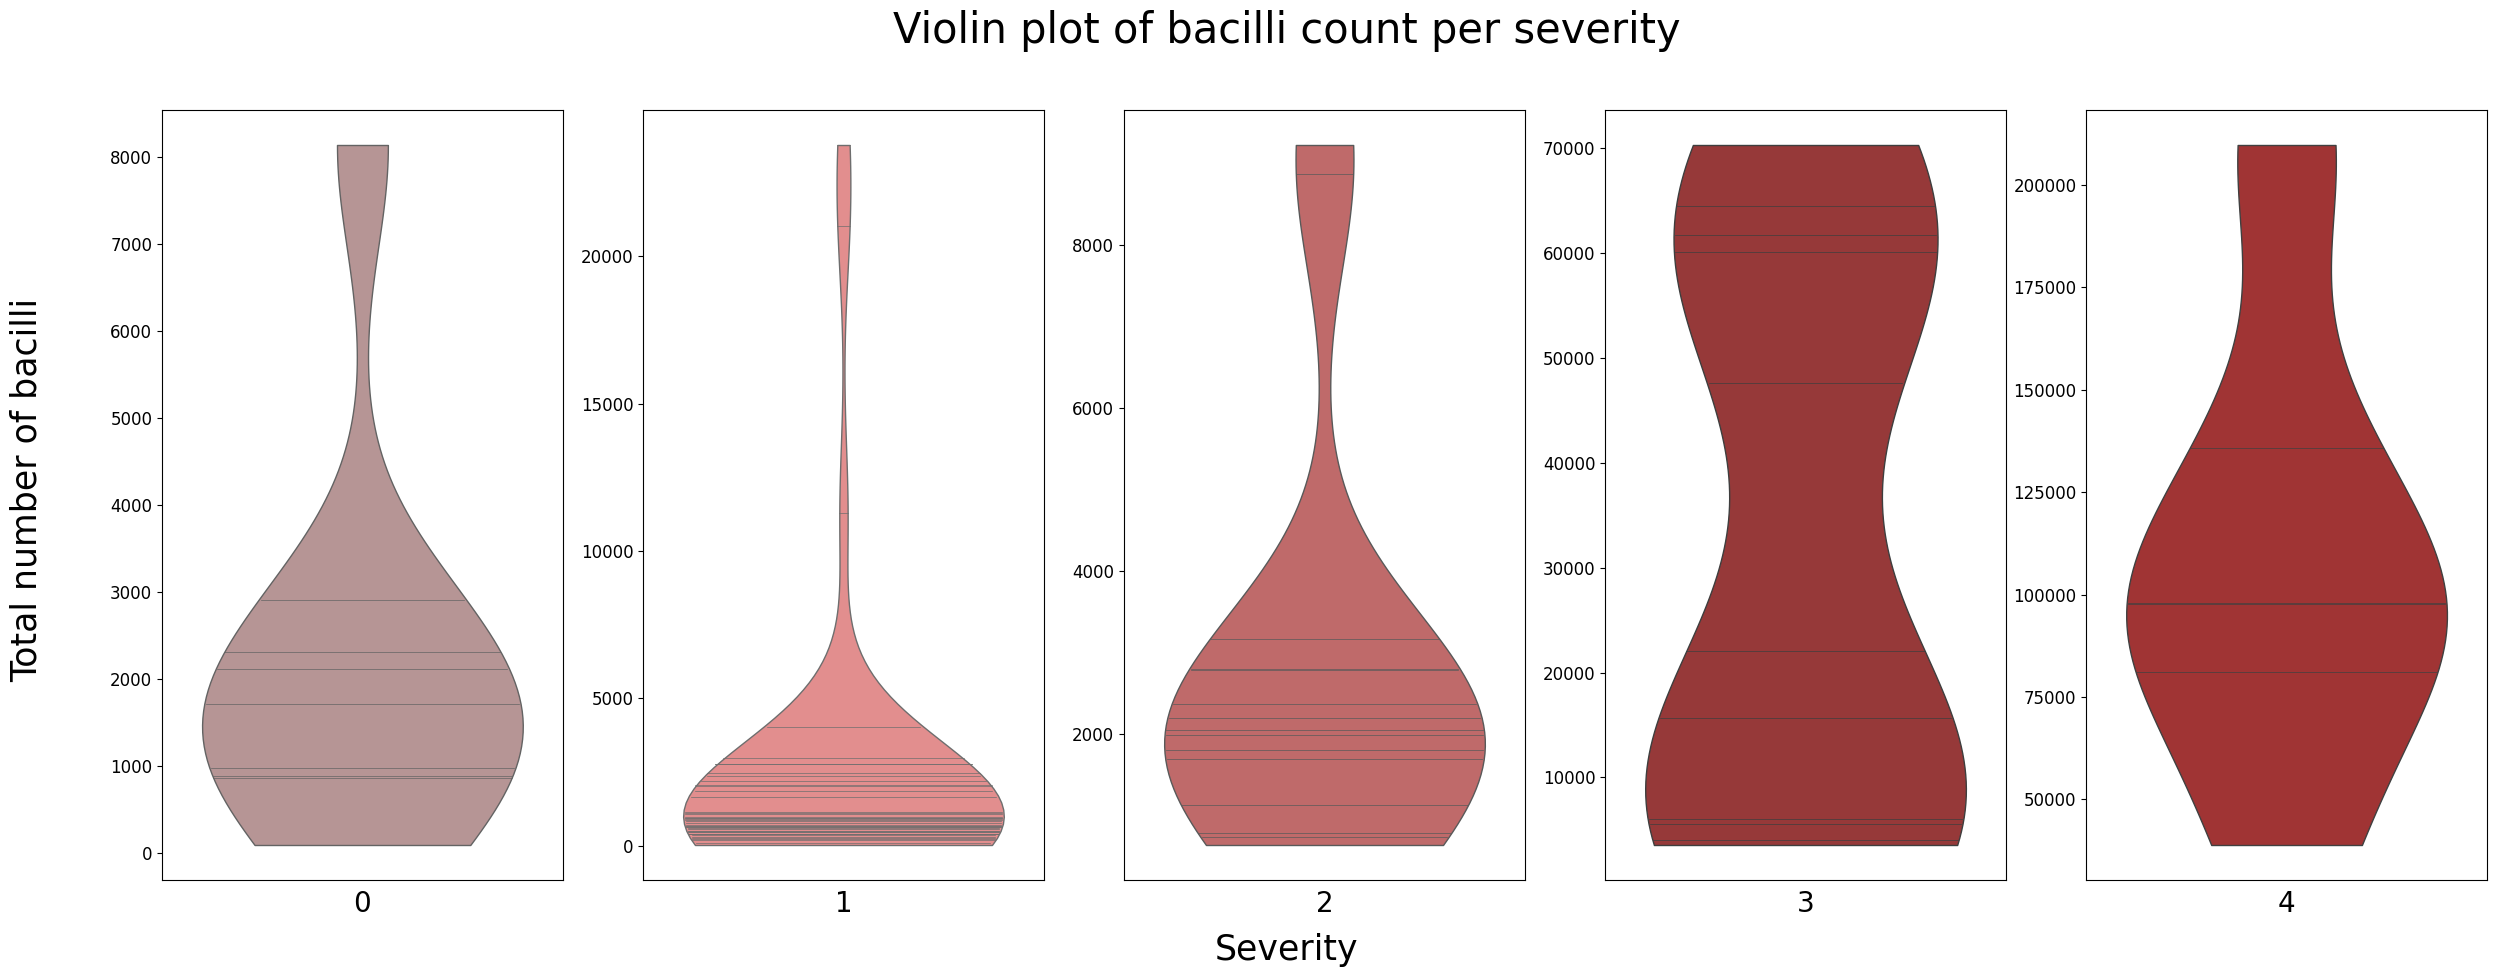

In [104]:
import seaborn as sns
import pandas as pd


# plot data using violin plot

fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5)
# increase fiugre size
fig.set_size_inches(30, 10)

sns.violinplot(data=severity_0, bw=0.5, cut=0, linewidth=1, color="rosybrown", inner="stick", ax=ax0)
sns.violinplot(data=severity_1, bw=0.5, cut=0, linewidth=1, color="lightcoral", inner="stick", ax=ax1)
sns.violinplot(data=severity_2, bw=0.5, cut=0, linewidth=1, color="indianred", inner="stick", ax=ax2)
sns.violinplot(data=severity_3, bw=0.5, cut=0, linewidth=1, color="brown", inner="stick", ax=ax3)
sns.violinplot(data=severity_4, bw=0.5, cut=0, linewidth=1, color="firebrick", inner="stick", ax=ax4)
# increase font size 
ax0.tick_params(labelsize=12)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)
ax4.tick_params(labelsize=12)
# set xlabel of each ax to severity
ax0.set_xlabel("0")
ax1.set_xlabel("1")
ax2.set_xlabel("2")
ax3.set_xlabel("3")
ax4.set_xlabel("4")
# increase font size of xlabel for each ax

# set xlabel of the whole figure to Severity
fig.text(0.5, 0.04, 'Severity', ha='center', va='center', fontsize=25)
# set ylabel of the whole figure to bacilli count
fig.text(0.08, 0.5, 'Total number of bacilli', ha='center', va='center', rotation='vertical', fontsize=25)

# increase font of xlabel 
ax0.xaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)
ax2.xaxis.label.set_size(20)
ax3.xaxis.label.set_size(20)
ax4.xaxis.label.set_size(20)
# remove scale of each ax x axis
ax0.set(xticks=[])
ax1.set(xticks=[])
ax2.set(xticks=[])
ax3.set(xticks=[])
ax4.set(xticks=[])

# title of plot
fig.suptitle("Violin plot of bacilli count per severity", fontsize=30)

# save violin plots
plt.savefig("violin_plots_smaller.png")
